In [3]:
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
import pandas as pd
from shapely.geometry import Point
import os

In [4]:
dept_num = ["Dept_11-00091", "Dept_23-00089",
            "Dept_24-00013", "Dept_24-00098",
            "Dept_35-00016", "Dept_35-00013",
            "Dept_37-00027", "Dept_37-00049",
            "Dept_49-00009", "Dept_49-00033",
            "Dept_49-00035", "Dept_49-00081"]

In [5]:
class Read:
    def __init__(self, data=""):
        self.data = data
        
    def __str__(self):
        return self.data
        
    def readShapefile(self):
        dept_folder = "cpe-data/" + self.data + "/"
        for folders in os.listdir(dept_folder):
            if "Shapefiles" in folders:
                police_shp_folder = folders
 
        for file in os.listdir(dept_folder + police_shp_folder):
            if ".shp" in file:
                shp_file = file
            
        police_shp_gdf = gpd.read_file(dept_folder + police_shp_folder + '/' + shp_file)
        return police_shp_gdf
    
    def readPrepCSV(self):
        dept_folder = "cpe-data/" + self.data + "/"
        for file in os.listdir(dept_folder):
            if ".csv" in file:
                preped_csv_file = file
                
        return pd.read_csv(dept_folder+preped_csv_file).iloc[1:].reset_index(drop = True)
        
    def readAgeRaceSex(self):
        
        dept_folder = "cpe-data/" + self.data + "/"
        for folders in os.listdir(dept_folder):
            if "ACS" in folders:
                 ACS_folder = folders
                
        for folders in os.listdir(dept_folder + ACS_folder):
            if "race" in folders:
                AgeRaceSex_census_folder = folders
        
        for files in os.listdir(dept_folder + ACS_folder + "/" + AgeRaceSex_census_folder):
            if "ann" in files:
                AgeRaceSex_census_file = files
                
        df = pd.read_csv(dept_folder + ACS_folder + "/" + AgeRaceSex_census_folder + "/" + AgeRaceSex_census_file)
        df.columns = df.iloc[0]
        return df.iloc[1:].reset_index(drop =True)
                
                
            
    def readEmployment(self):
        dept_folder = "cpe-data/" + self.data + "/"
        
        for folders in os.listdir(dept_folder):
            if "ACS" in folders:
                 ACS_folder = folders
                
        for folders in os.listdir(dept_folder + ACS_folder):
            if "employment" in folders:
                Employment_census_folder = folders
        
        for files in os.listdir(dept_folder + ACS_folder + "/" + Employment_census_folder):
            if "ann" in files:
                Employment_census_file = files
        
        df = pd.read_csv(dept_folder + ACS_folder + "/" + Employment_census_folder + "/" + Employment_census_file)
        df.columns = df.iloc[0]
        return df.iloc[1:].reset_index(drop =True)
    
    def readPoverty(self):
        dept_folder = "cpe-data/" + self.data + "/"
        
        for folders in os.listdir(dept_folder):
            if "ACS" in folders:
                 ACS_folder = folders
                
        for folders in os.listdir(dept_folder + ACS_folder):
            if "poverty" in folders:
                Poverty_census_folder = folders
        
        for files in os.listdir(dept_folder + ACS_folder + "/" + Poverty_census_folder):
            if "ann" in files:
                Poverty_census_file = files
                
        df = pd.read_csv(dept_folder + ACS_folder + "/" + Poverty_census_folder + "/" + Poverty_census_file)
        df.columns = df.iloc[0]
        return df.iloc[1:].reset_index(drop =True)
    
    def readEducationOver25(self):
        dept_folder = "cpe-data/" + self.data + "/"
        
        for folders in os.listdir(dept_folder):
            if "ACS" in folders:
                 ACS_folder = folders
                
        for folders in os.listdir(dept_folder + ACS_folder):
            if "over-25" in folders:
                Education_census_folder = folders
        
        for files in os.listdir(dept_folder + ACS_folder + "/" + Education_census_folder):
            if "ann" in files:
                Education_census_file = files
                
        df = pd.read_csv(dept_folder + ACS_folder + "/" + Education_census_folder + "/" + Education_census_file)
        df.columns = df.iloc[0]
        return df.iloc[1:].reset_index(drop = True)
        
    
    def readTracts(self):
        pass
    
        

In [6]:
# read dept file regarding different region
MA = Read(dept_num[0])
IN = Read(dept_num[1])
MN1 = Read(dept_num[2])
MN2 = Read(dept_num[3])
FL1 = Read(dept_num[4])
FL2 = Read(dept_num[5])
TX1 = Read(dept_num[6])
TX2 = Read(dept_num[7])
CA1 = Read(dept_num[8])
CA2 = Read(dept_num[9])
CA3 = Read(dept_num[10])
CA4 = Read(dept_num[11])

In [7]:
MA_CSV = MA.readPrepCSV()
MA_SHP = MA.readShapefile()
MA_AgeRaceSex = MA.readAgeRaceSex()
MA_Employment = MA.readEmployment()
MA_Poverty = MA.readPoverty()
MA_EducationOver25 = MA.readEducationOver25()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (0,1,5,20,25,26,27,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


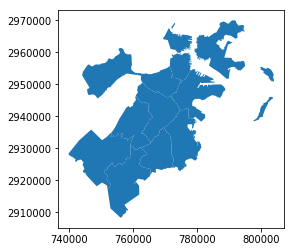

In [10]:
M

In [8]:
MA_CSV.head()

,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_UNIQUE_IDENTIFIER.1,SUBJECT_GENDER,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_DISTRICT,LOCATION_DISTRICT.1,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_DETAILS,SUBJECT_RACE,...,VEHICLE_DETAILS.1,OFFICER_SUPERVISOR,OFFICER_ID,OFFICER_ASSIGNMENT,OFFICER_ASSIGNMENT.1,OFFICER_ETHNICITY,OFFICER_RACE,OFFICER_AGE,LOCATION_STREET_NUMBER,LOCATION_CITY
0,938283,621880,MALE,NORMANDY ST at SUPPLE RD,B2,3,12/10/13 0:00,12/10/13 0:00,YES,B(Black),...,MA,10132,98656,9999,OTHER,NaN,B(Black),59,3274,NO DATA ENTERED
1,881897,565177,MALE,75 BOYLSTON ST,A1,1,5/24/12 0:00,5/24/12 0:00,NO,W(White),...,NO DATA ENTERED,8949,9765,1,A1,NaN,W(White),26,543,OTHER
2,882060,565340,MALE,5 TOPLIFF ST,C11,5,6/4/12 0:00,6/4/12 0:00,YES,B(Black),...,NO DATA ENTERED,11312,83575,16,YVSF,NaN,B(Black),18,4493,NO DATA ENTERED
3,971623,653895,MALE,170 MORTON ST,B2,3,6/21/14 0:00,6/21/14 0:00,YES,B(Black),...,NO DATA ENTERED,9375,76146,25,BIKE,NaN,B(Black),24,3094,Dorchester
4,882761,566043,MALE,0 ST ALPHONSUS ST,B2,3,12/2/10 0:00,12/2/10 0:00,YES,B(Black),...,MA,NaN,107106,3,B2,NaN,B(Black),70,4241,Dorchester


After viewing the columns, LOCATION_DISTRICT of shapefile and 

In [148]:
TX1_CSV = TX1.readPrepCSV()
TX1_SHP = TX1.readShapefile()
TX1_AgeRaceSex = TX1.readAgeRaceSex()
TX1_Employment = TX1.readEmployment()
TX1_Poverty = TX1.readPoverty()
TX1_EducationOver25 = TX1.readEducationOver25()